# Business Case: Yulu - Hypothesis Testing

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
- Strategically positioned Yulu zones span key locations such as metro stations, bus stands, residential areas, corporate offices, and commercial hubs.This network ensures seamless connectivity for commuters, making the first and last miles of their journey smooth, cost-effective, and hassle-free.

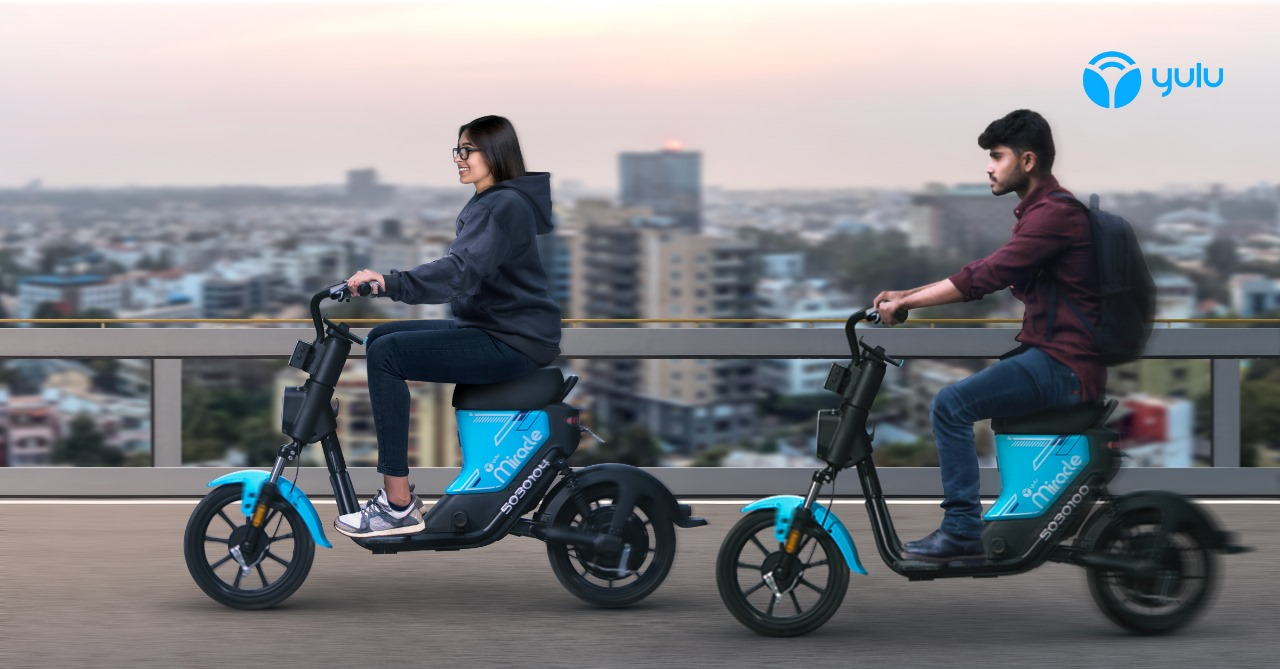

### Business Problem:

 The company aims to address the following inquiries:
 
        1. Identification of Significant Variables: Determining the key variables that play a significant role in predicting the demand for shared electric cycles within the Indian market.
        2. Evaluation of Variable Efficacy: Assessing how well the identified variables collectively describe the fluctuations and patterns observed in electric cycle demand. 

## Dataset Information:

#### Source:
Please check the dataset at: "[Dataset Link](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089)"

#### Feature Information:
* **datetime:** datetime
* **season:** season (1: spring, 2: summer, 3: fall, 4: winter)
* **holiday:** whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* **workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.
* **weather:**
    * 1: Clear, Few clouds, partly cloudy, partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* **temp:** temperature in Celsius
* **atemp:** feeling temperature in Celsius
* **humidity:** humidity
* **windspeed:** wind speed
* **casual:** count of casual users
* **registered:** count of registered users
* **count:** count of total rental bikes including both casual and registered

## Loading the "yulu_data.csv" Dataset:
For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn,Scipy and then import the "yulu_data.csv" dataset and save it in a dataframe "data".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [3]:
# Getting the first five records of the data

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Getting the shape of the data

data.shape

(10886, 12)

## Basic Exploration of Data:

In [5]:
# Checking the info of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Changing the dtype of 'datetime' column from object to datetime

data['datetime'] = pd.to_datetime(data['datetime'])

In [7]:
# Creating two features 'date', 'year', 'month' and 'hour' from the feature 'datetime'

data['date'] = pd.to_datetime(data['datetime'].dt.date)
data['year'] = (data['datetime']).dt.year
data['month'] = (data['datetime']).dt.month
data['hour'] = data['datetime'].dt.hour

In [8]:
# Changing the dtype of categorical features 'season', 'holiday', 'workingday', 'weather' from int to object

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    data[col] = data[col].astype('object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  datetime64[ns]
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](2), 

In [10]:
# Checking for missing values

data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
year          0
month         0
hour          0
dtype: int64

- There is no missing values in the dataset.

In [11]:
# Checking for duplicate records

data.duplicated().sum()

0

- There is no duplicate rows in the dataset.

## Statistical Summary:

In [12]:
df_num = data[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
df_num.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- **casual**, **registered** and **count** features might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these features.

In [13]:
df_cat = data[['season', 'holiday', 'workingday', 'weather']]
df_cat.describe()

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [69]:
# minimum datetime and maximum datetime

data['datetime'].min(), data['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

# Univariate Analysis:

### Categorical features:

In [64]:
# Getting the Value counts for categorical columns

df_cat = data[['season', 'holiday', 'workingday', 'weather']]
for col in df_cat.columns:
    print(col+":")
    print(df_cat[col].value_counts())
    print("-"*50)
    print()

season:
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
--------------------------------------------------

holiday:
0    10575
1      311
Name: holiday, dtype: int64
--------------------------------------------------

workingday:
1    7412
0    3474
Name: workingday, dtype: int64
--------------------------------------------------

weather:
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
--------------------------------------------------



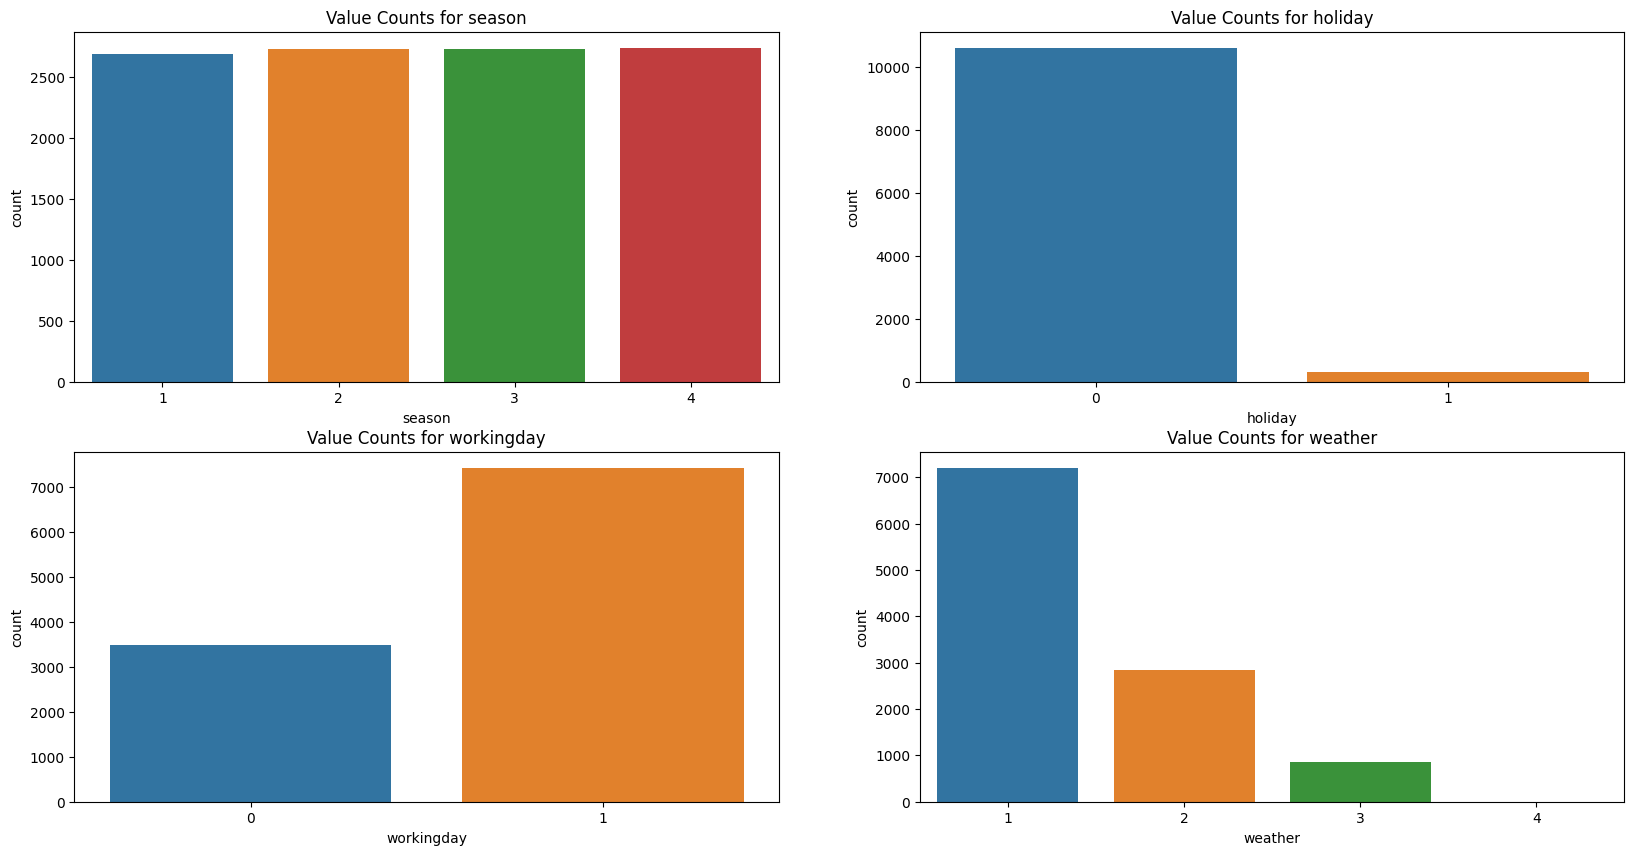

In [63]:
# Creating countplots for 'season', 'holiday', 'workingday', 'weather'

fig = plt.subplots(figsize=(20, 10))

for idx, col in enumerate(df_cat.columns):
    plt.subplot(2, 2, idx+1)
    sns.countplot(x = col, data = df_cat)
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    
plt.show()

- Data looks like as it has equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

### Numerical Features:

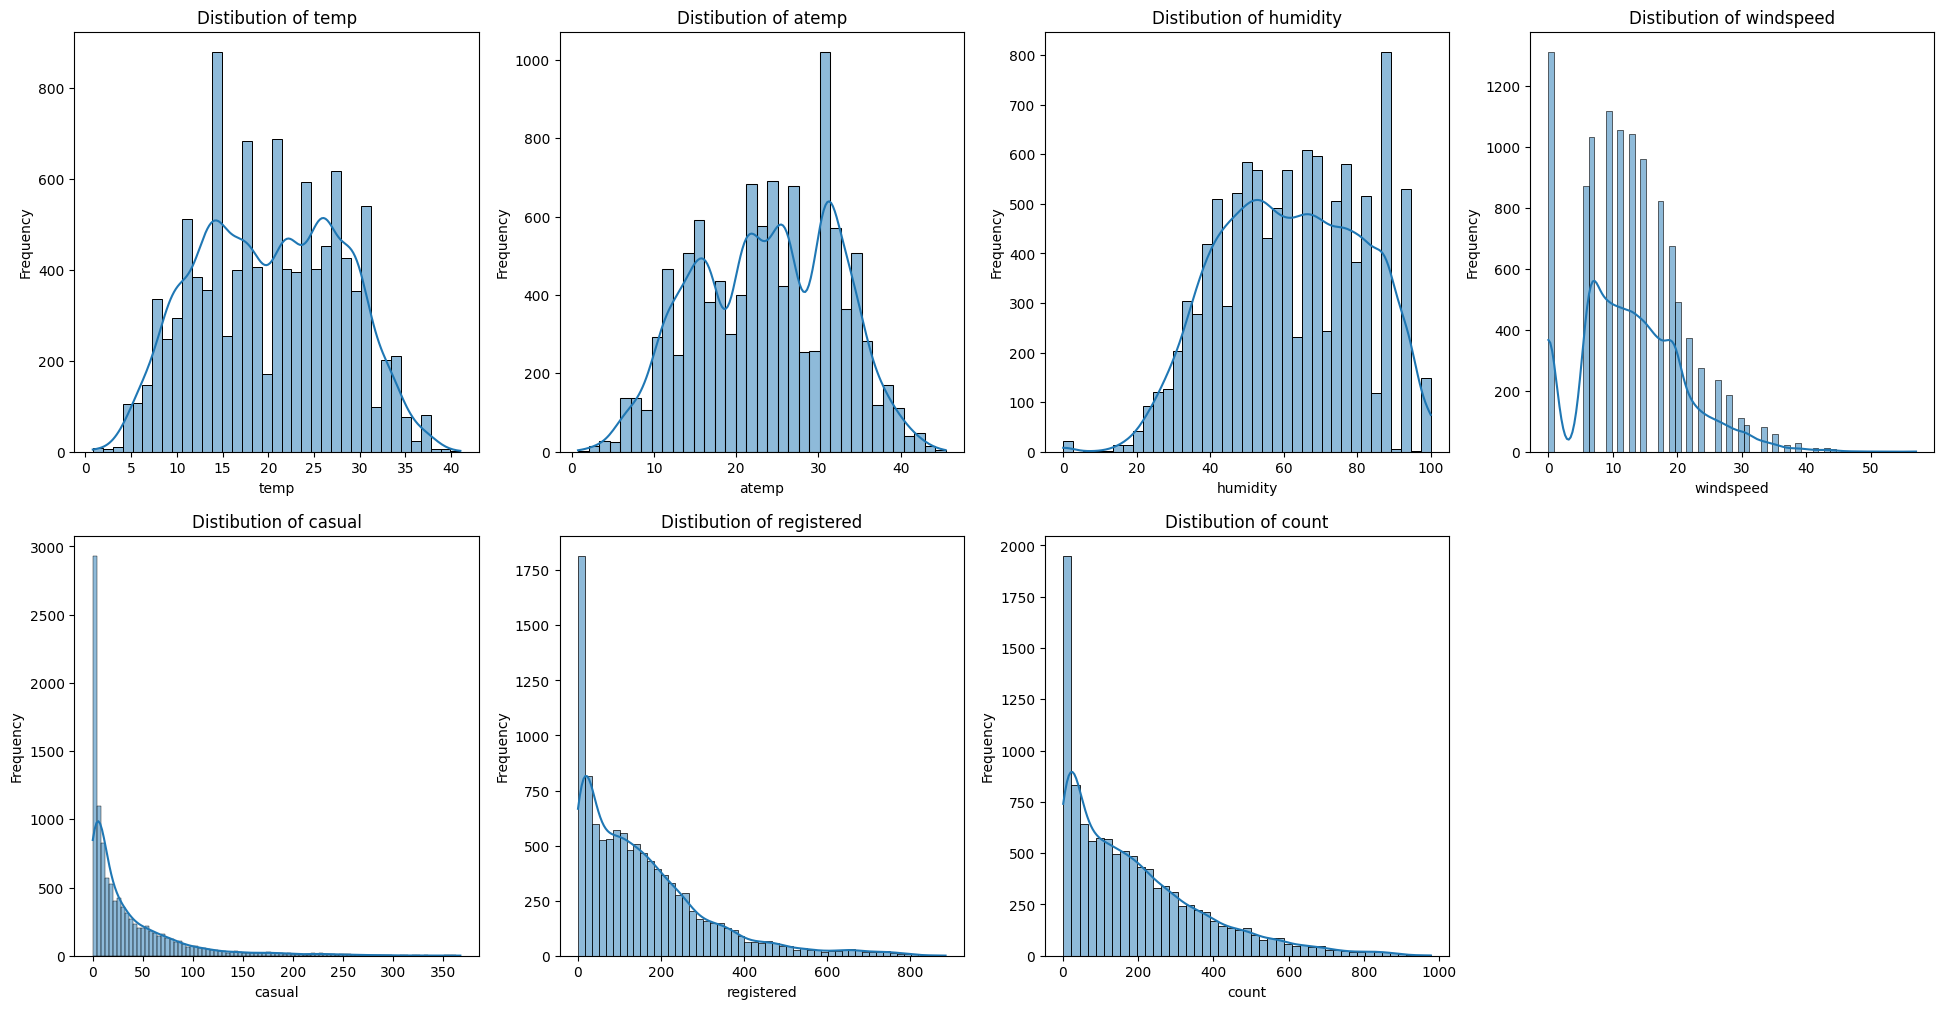

In [16]:
df_num = data[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

fig = plt.subplots(figsize=(24, 12))

for idx, col in enumerate(df_num.columns):
    plt.subplot(2, 4, idx+1)
    sns.histplot(x = col, data = df_num, kde = True)
    plt.title(f"Distibution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.show()

In [65]:
df_num.skew()

temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

- It seems like **windspeed, casual, registered, count** features are right skewed and may have outliers.
- The features temp, atemp, humidity are almost normal.

### Outlier Treatment:

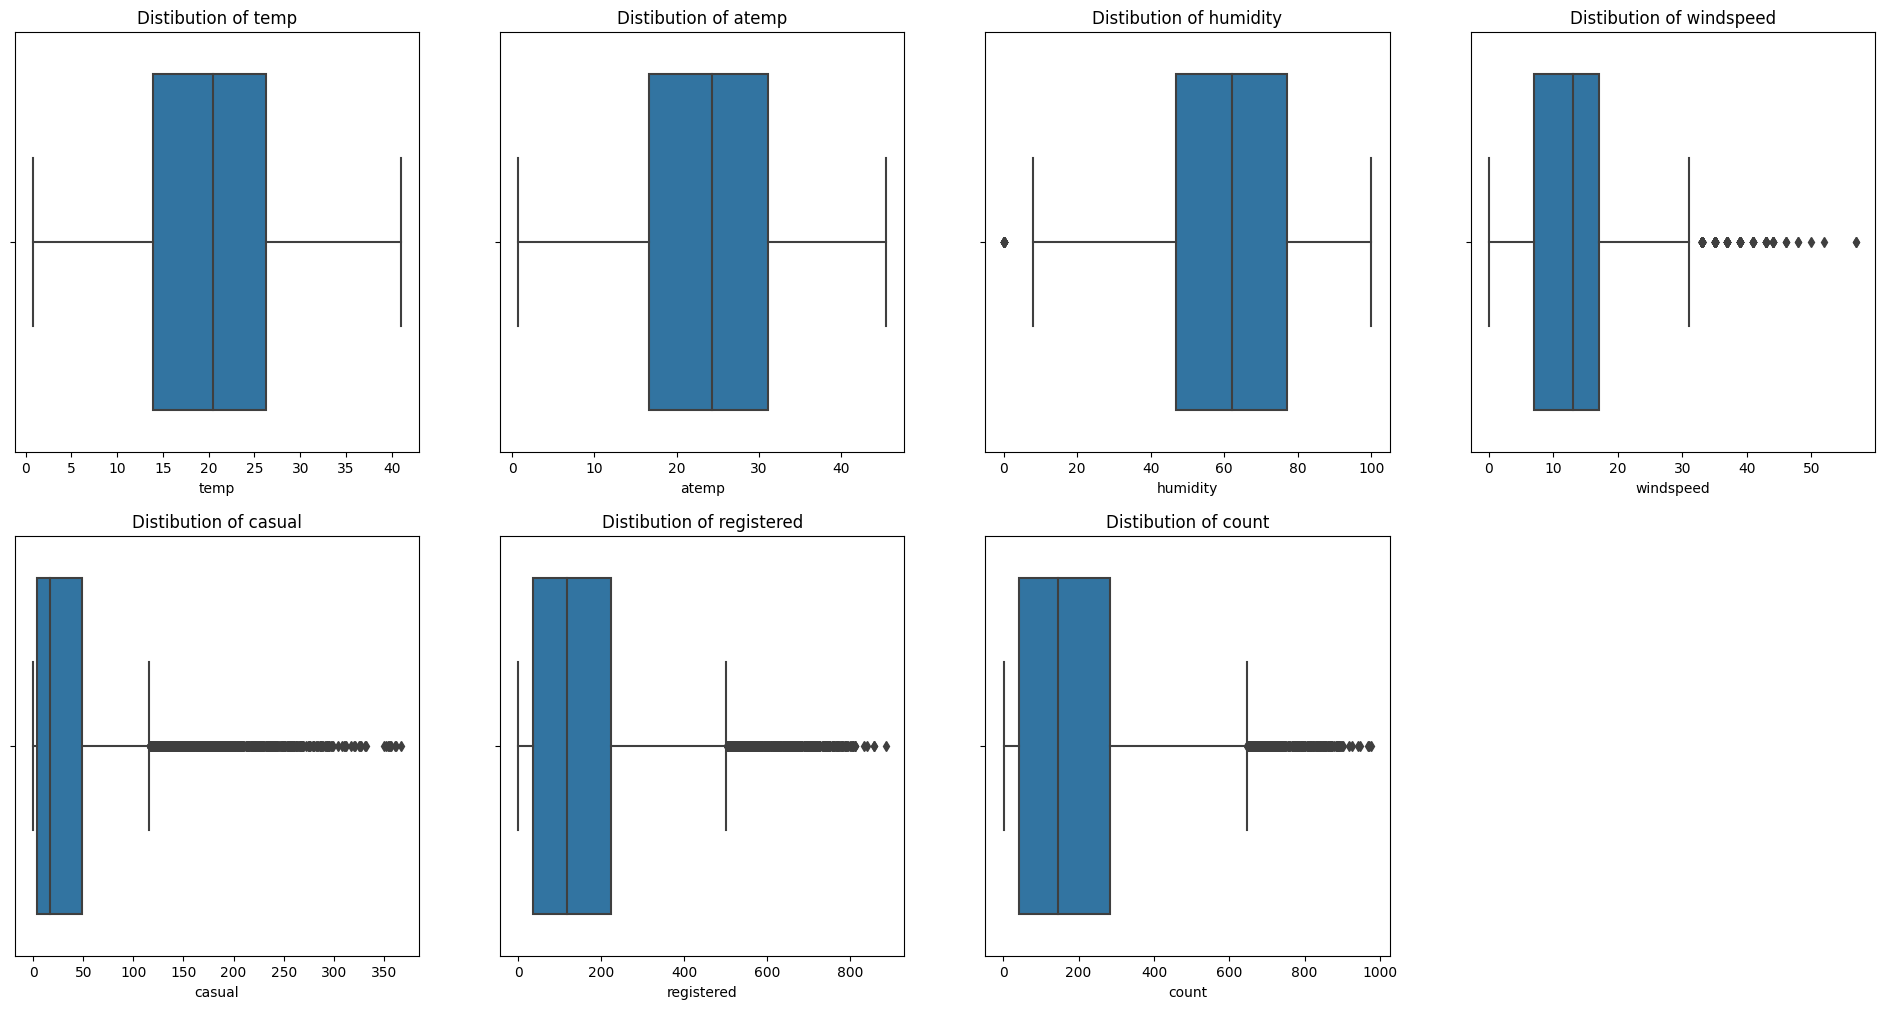

In [17]:
df_num = data[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

fig = plt.subplots(figsize=(24, 12))

for idx, col in enumerate(df_num.columns):
    plt.subplot(2, 4, idx+1)
    sns.boxplot(x = col, data = df_num)
    plt.title(f"Distibution of {col}")
    plt.xlabel(col)
    
plt.show()

- The features **humidity, windspeed, casual, registered** and **count** have outliers in the data.

In [18]:
# getting the first quartile
Q1 = df_num.quantile(0.25)

# getting the third quartile
Q3 = df_num.quantile(0.75)

# calculating the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
dtype: float64


In [19]:
# Define the condition for outliers
outlier_condition = ~((df_num < (Q1 - 1.5*IQR))|(df_num > (Q3 + 1.5*IQR))).any(axis = 1)

# Filter the DataFrame based on the outlier condition
df = data[outlier_condition]

In [20]:
data.shape

(10886, 16)

In [21]:
df.shape

(9518, 16)

- After removing the outliers the shape of our dataset is (9518, 16), which means it contains 9518 rows and 16 columns.

# Bivariate Analysis:

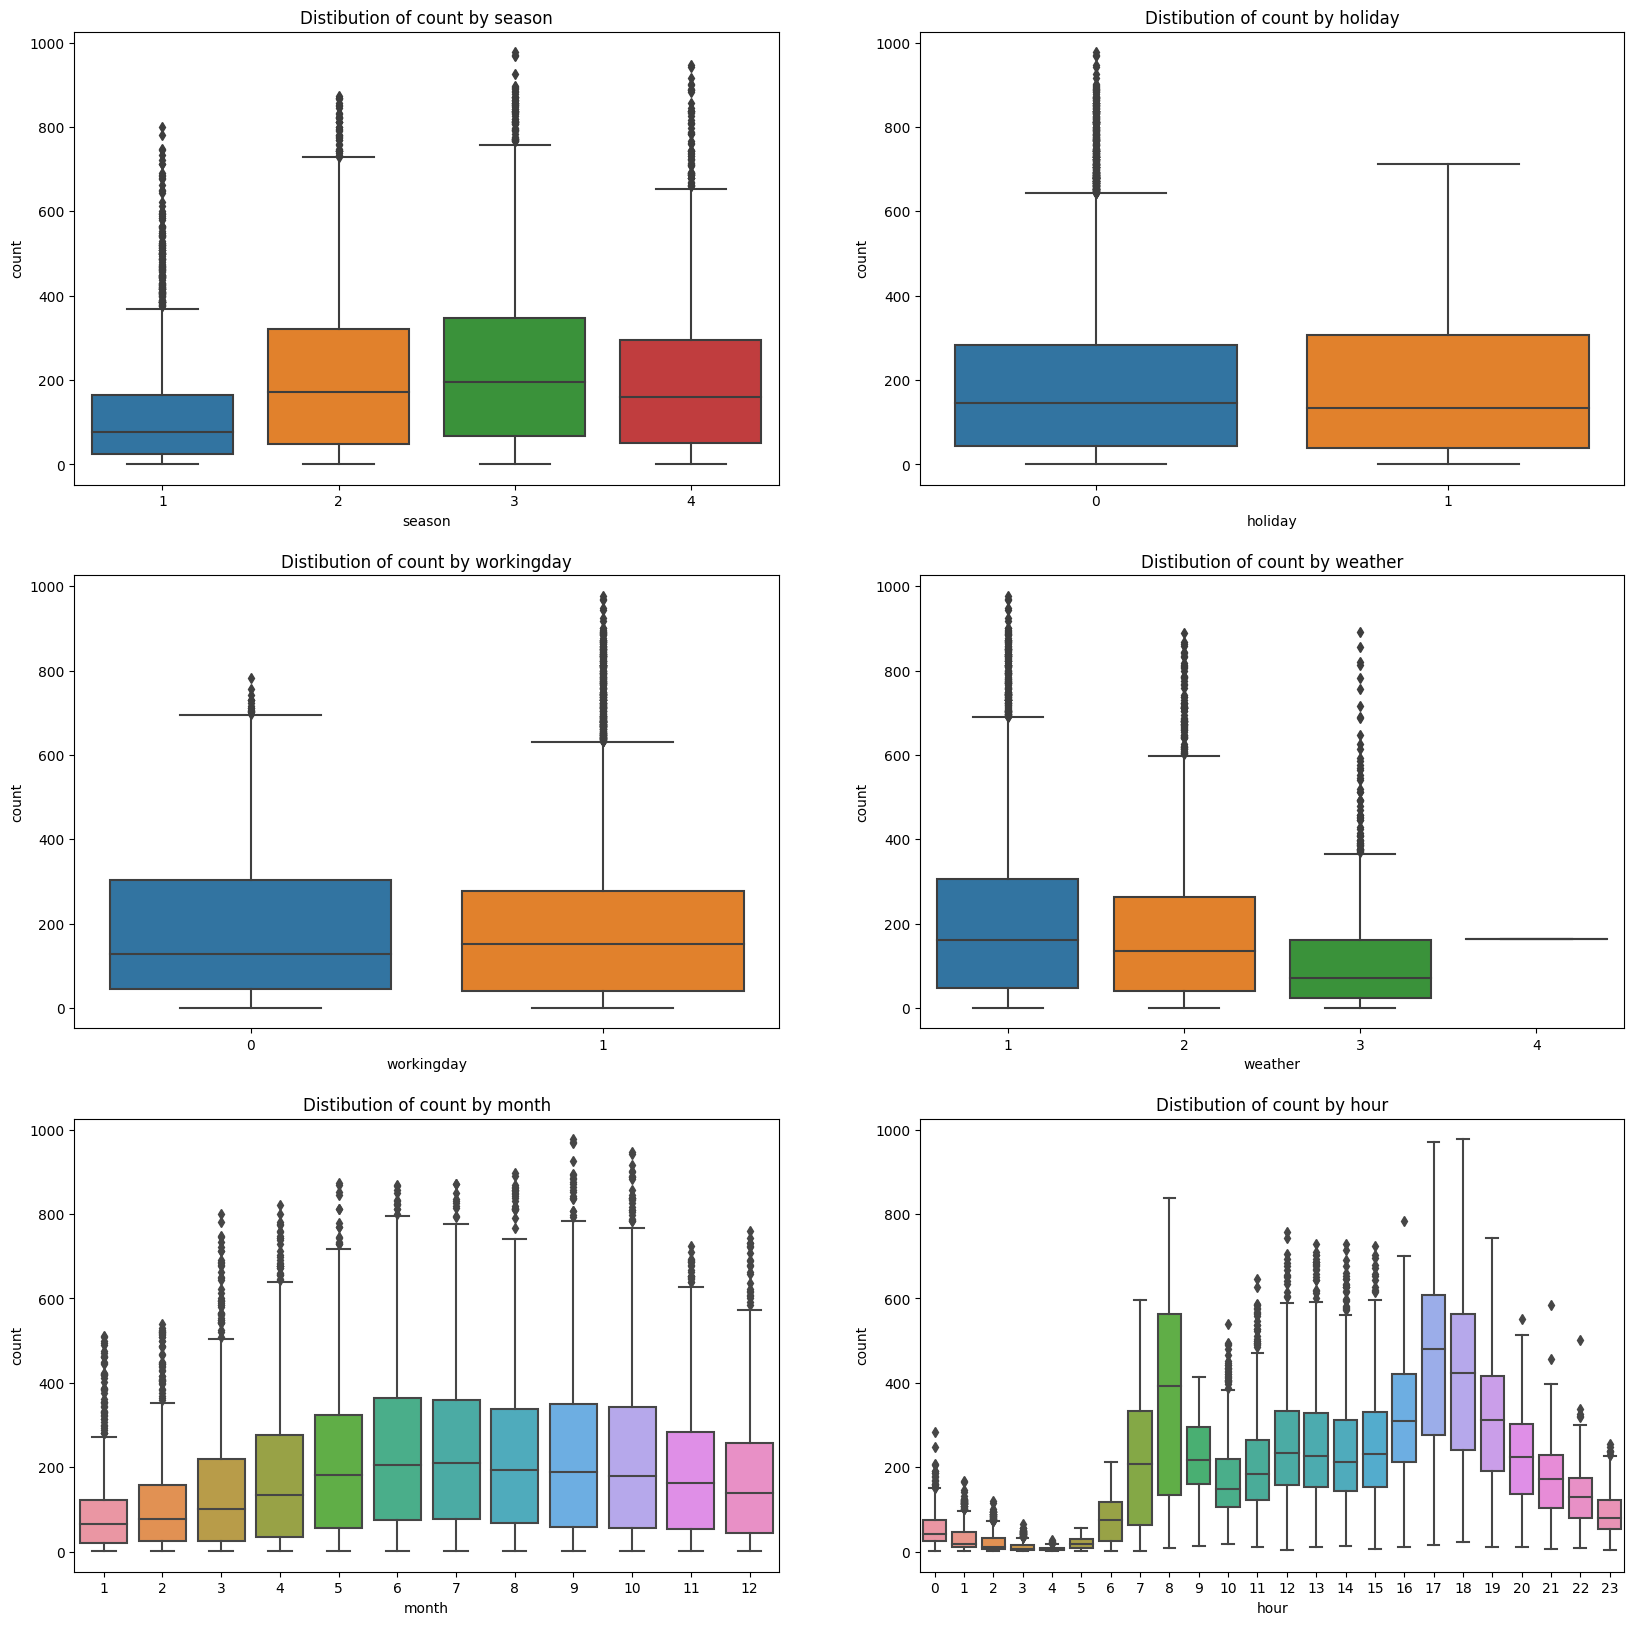

In [68]:
# plotting categorical variables againt 'count' using boxplots

cat_col = ['season', 'holiday', 'workingday', 'weather', 'month', 'hour']

fig = plt.subplots(figsize=(20, 20))

for idx, col in enumerate(data[cat_col].columns):
    plt.subplot(3, 2, idx+1)
    sns.boxplot(x = col, y = 'count', data = data)
    plt.title(f"Distibution of count by {col}")
    
plt.show()

- In **fall** and **summer** seasons, more vehicles are rented as compared to other seasons.
- Whenever it's a **holiday** more vehicles were rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more vehicles were rented.
- Whenever there is **rain, thunderstorm, snow or fog**, there were less vehicles were rented.
- In the month of **June, July, October, November** more vehicles were rented.
- During a day, more vehicles were rented and it is high in the morning from **7am to 8am** and afternoon **5pm to 6pm**.

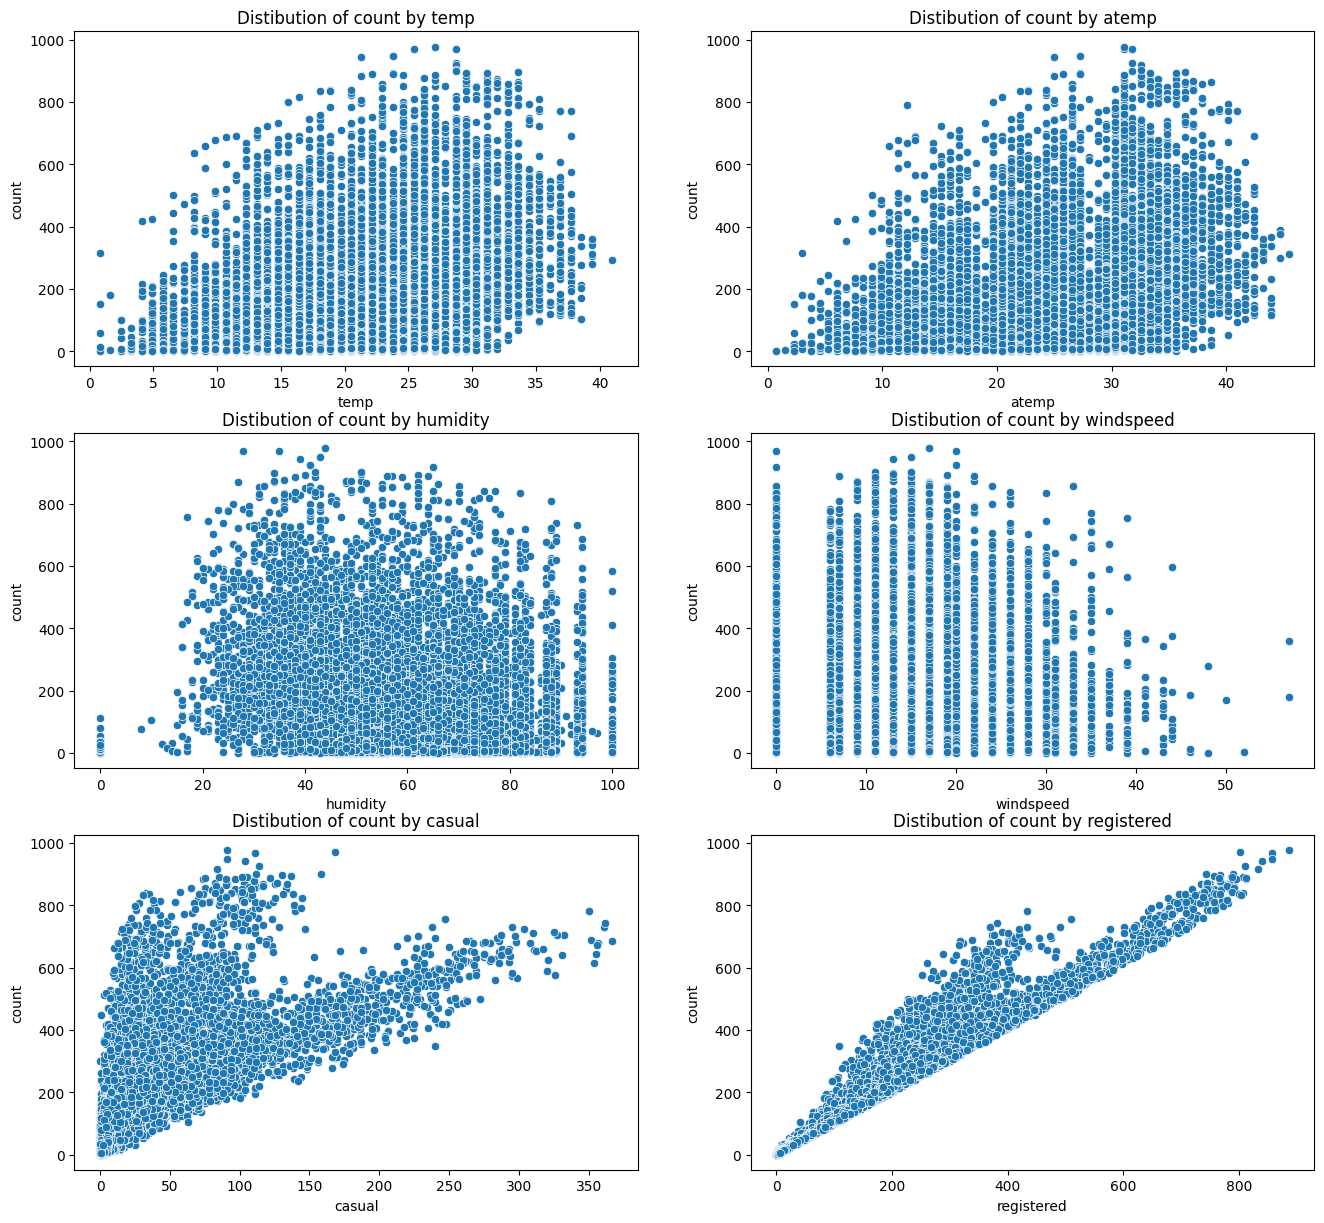

In [23]:
# plotting numerical variables againt 'count' using scatterplot

num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

fig = plt.subplots(figsize=(16, 20))

for idx, col in enumerate(data[num_col].columns):
    plt.subplot(4, 2, idx+1)
    sns.scatterplot(x = col, y = 'count', data = data)
    plt.title(f"Distibution of count by {col}")
    
plt.show()

- Whenever the humidity is less than 20, number of vehicles rented is very very low.
- Whenever the temperature is less than 10, number of vehicles rented is less.
- Whenever the windspeed is greater than 35, number of vehicles rented is less.

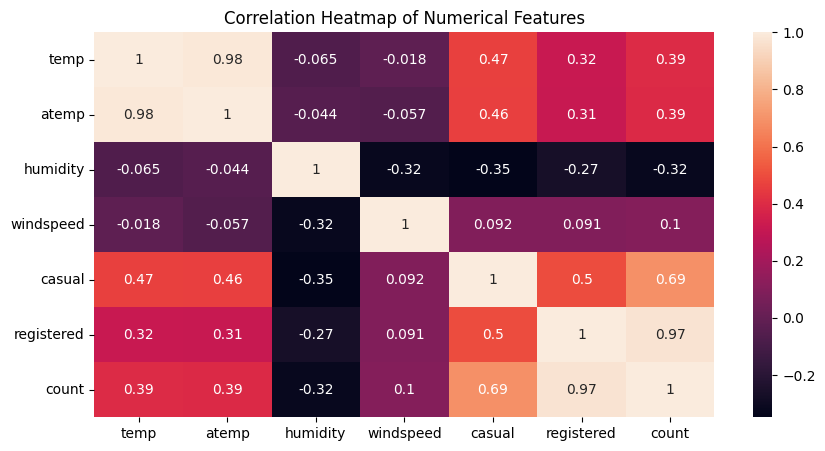

In [24]:
# Heatmap

plt.figure(figsize = (10,5))
sns.heatmap(data[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(), annot = True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- temp and atemp, casual and count, registered and count are highly correlated.
- temp and count are moderately correlated.
- humidity and count, humidity and windspeed are negatively correlated.

# Hypothesis Testing:

## 1. Effect of Working Day on Electric Vehicle Rentals:

In [25]:
data.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

We can observe that:  
- For working day, the number of average rental vehicles is higher than the non-working days.

So, to check whether the mean rental count is significant or not, we can do `ttest_ind` by taking significant level 5%.

In [26]:
from scipy.stats import ttest_ind

a = data[data['workingday'] == 0]['count']
b = data[data['workingday'] == 1]['count']

# Null Hypothesis(H0): The average rental vehicles are independent of working days. 
# Alternate Hypothesis(H1): The average rental vehicles are dependent on working days. 

t_stat, p_value = ttest_ind(a, b)
print("t_statistics:", t_stat)
print("p_value:", p_value)

t_statistics: -1.2096277376026694
p_value: 0.22644804226361348


In [27]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0.")
    print("The average rental vehicles are dependent of working days.")
else:
    print("Failed to reject H0.")
    print("The average rental vehicles are independent of working days.")

Failed to reject H0.
The average rental vehicles are independent of working days.


- Since p_value is 0.2264 which is greater than 0.05, we can say that, the working day has no effect on average rental vehicles.

**Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of vehicles being rented.**

## 2. Comparing Number of Vehicles Rented Across Weather Conditions and Seasons:

### Q-Q Plot for count:

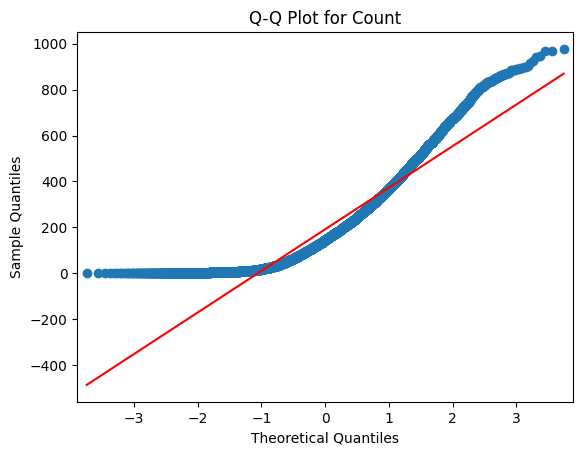

In [73]:
import statsmodels.api as sm

sm.qqplot(data['count'], line = 's')
plt.title('Q-Q Plot for Count')
plt.show()

- Since the curve bends downwards, indicating that the it has a heavier right tail.
- Since the curvature of the points moves away from the reference line in the middle, it indicates that the data has heavier tails than a normal distribution.This suggests kurtosis, or the presence of outliers or extreme values in the data.

In [74]:
data['count'].skew()

1.2420662117180776

In [75]:
data['count'].kurt()

1.3000929518398334

- The feature 'count' has positive kurtosis and positive skewness, suggesting that it deviates from a normal distribution, with heavier tails on the right side and more outliers.

### a. Impact of Weather on Vehicles Rented:

In [28]:
data['weather'].unique()

array([1, 2, 3, 4], dtype=object)

- There are categorical feature 'weather' contains four categories and 'count' is a numerical feature.
- To check if 'weather' has an impact on 'count', we can perform One-way ANOVA or Kruskal-Walli's Test.

In [29]:
d_w1 = data[data['weather'] == 1]['count']
d_w2 = data[data['weather'] == 2]['count']
d_w3 = data[data['weather'] == 3]['count']
d_w4 = data[data['weather'] == 4]['count']

- If the data follows:

    i. normal distribution and ii. the variences are equal between the groups d_w1, d_w2, d_w3, d_w4
    
    we will apply ANOVA, otherwise we will perform Kruskal-Walli's Test.
- To test normality, we perform Shapiro-Wilk Test and to check equal variance, we perform Levene Test.

#### Test for Normality:

In [30]:
from scipy.stats import shapiro

# H0: Data is Gaussian
# Ha: Data is not Gaussian

# Shapiro-Wilk test for d_w1
stat, pvalue_d_w1 = shapiro(d_w1)

# Shapiro-Wilk test for d_w2
stat, pvalue_d_w2 = shapiro(d_w2)

# Shapiro-Wilk test for d_w3
stat, pvalue_d_w3 = shapiro(d_w3)

# Shapiro-Wilk test for d_w4 can not be done since len(d_w4) < 3



alpha = 0.05
print("Shaprio results:")
print("d_w1:", pvalue_d_w1,"; Not normally distributed" if pvalue_d_w1 <= alpha else " ; Normally distributed")
print("d_w2:", pvalue_d_w2,"; Not Normally distributed" if pvalue_d_w2 <= alpha else " ; Normally distributed")
print("d_w3:", pvalue_d_w3,"; Not Normally distributed" if pvalue_d_w3 <= alpha else " ; Normally distributed")
print()

Shaprio results:
d_w1: 0.0 ; Not normally distributed
d_w2: 9.781063280987223e-43 ; Not Normally distributed
d_w3: 3.876090133422781e-33 ; Not Normally distributed



#### Test for Variance:

In [31]:
from scipy.stats import levene

# H0: Variances are equal
# H1: Variances are not equal

levene_stat, p_value = levene(d_w1, d_w2, d_w3, d_w4)
print("levene statistic:", levene_stat)
print("p_value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Variances are not equal")
else:
    print("Failed to reject H0")
    print("Variances are equal")

levene statistic: 54.85106195954556
p_value: 3.504937946833238e-35
Reject H0
Variances are not equal


- Since data is not normally distributed and variances among the groups are not equal, we perform Kruskal-Walli's test.

In [32]:
from scipy.stats import kruskal

# H0: weather has no impact on count
# H1: weather has an impact on count

stat, p_value = kruskal(d_w1, d_w2, d_w3, d_w4)
print("test statistic:", stat)
print("p_value:", p_value)

test statistic: 205.00216514479087
p_value: 3.501611300708679e-44


In [33]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0.")
    print("At least one of the medians of the rental count is different among the four weathers.")
else:
    print("Failed to reject H0.")
    print("The medians of the of the rental count are same for the four weathers.")

Reject H0.
At least one of the medians of the rental count is different among the four weathers.


**Rejecting the null hypothesis suggests that there are differences in rental counts across different weather conditions, but further analysis may be needed to understand the nature and significance of these differences.**

### b. Impact of Season on Vehicles Rented:

In [34]:
data['season'].unique()

array([1, 2, 3, 4], dtype=object)

- There are categorical feature 'season' contains four categories and 'count' is a numerical feature.
- To check if 'season' has an impact on 'count', we can perform One-way ANOVA or Kruskal-Walli's Test.

In [35]:
d_s1 = data[data['season'] == 1]['count']
d_s2 = data[data['season'] == 2]['count']
d_s3 = data[data['season'] == 3]['count']
d_s4 = data[data['season'] == 4]['count']

- If the data follows:

    i. normal distribution and ii. the variences are equal between the groups d_s1, d_s2, d_s3, d_s4
    
    we will apply ANOVA, otherwise we will perform Kruskal-Walli's Test.
    
- To test normality, we perform Shapiro-Wilk Test and to check equal variance, we perform Levene Test.

#### Test for Normality:

In [36]:
from scipy.stats import shapiro

# H0: Data is Gaussian
# Ha: Data is not Gaussian

# Shapiro-Wilk test for d_s1
stat, pvalue_d_s1 = shapiro(d_s1)

# Shapiro-Wilk test for d_s2
stat, pvalue_d_s2 = shapiro(d_s2)

# Shapiro-Wilk test for d_s3
stat, pvalue_d_s3 = shapiro(d_s3)

# Shapiro-Wilk test for d_s4
stat, pvalue_d_s4 = shapiro(d_s4)



alpha = 0.05
print("Shaprio results:")
print("d_s1:", pvalue_d_s1,"; Not normally distributed" if pvalue_d_s1 <= alpha else " ; Normally distributed")
print("d_s2:", pvalue_d_s2,"; Not Normally distributed" if pvalue_d_s2 <= alpha else " ; Normally distributed")
print("d_s3:", pvalue_d_s3,"; Not Normally distributed" if pvalue_d_s3 <= alpha else " ; Normally distributed")
print("d_s4:", pvalue_d_s4,"; Not Normally distributed" if pvalue_d_s4 <= alpha else " ; Normally distributed")

Shaprio results:
d_s1: 0.0 ; Not normally distributed
d_s2: 6.039093315091269e-39 ; Not Normally distributed
d_s3: 1.043458045587339e-36 ; Not Normally distributed
d_s4: 1.1301682309549298e-39 ; Not Normally distributed


#### Test for Variance:

In [37]:
from scipy.stats import levene

# H0: Variances are equal
# H1: Variances are not equal

levene_stat, p_value = levene(d_s1, d_s2, d_s3, d_s4)
print("levene statistic:", levene_stat)
print("p_value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Variances are not equal")
else:
    print("Failed to reject H0")
    print("Variances are equal")

levene statistic: 187.7706624026276
p_value: 1.0147116860043298e-118
Reject H0
Variances are not equal


- Since data is not normally distributed and variances among the groups are not equal, we perform Kruskal-Walli's test.

In [38]:
from scipy.stats import kruskal

# H0: weather has no impact on count
# H1: weather has an impact on count

stat, p_value = kruskal(d_s1, d_s2, d_s3, d_s4)
print("test statistic:", stat)
print("p_value:", p_value)

test statistic: 699.6668548181988
p_value: 2.479008372608633e-151


In [39]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0.")
    print("At least one of the medians of the rental count is different among the four seasons.")
else:
    print("Failed to reject H0.")
    print("The medians of the of the rental count are same for the four seasons.")

Reject H0.
At least one of the medians of the rental count is different among the four seasons.


**Rejecting the null hypothesis suggests that there are differences in rental counts across different seasons, but further analysis may be needed to understand the nature and significance of these differences.**

## 3. Testing the Dependency of Weather on Season:

- Since weather and season are two categorical features, to check if there is any dependancy of weather on season and viceversa, we perform Test of Independence(Chisquare Test).

In [44]:
data['weather'].unique()

array([1, 2, 3, 4], dtype=object)

In [45]:
data['season'].unique()

array([1, 2, 3, 4], dtype=object)

In [46]:
pd.crosstab(data['weather'], data['season'])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [47]:
values = pd.crosstab(data['weather'], data['season']).values
values

array([[1759, 1801, 1930, 1702],
       [ 715,  708,  604,  807],
       [ 211,  224,  199,  225],
       [   1,    0,    0,    0]], dtype=int64)

In [48]:
from scipy.stats import chi2_contingency

# H0: weather and season are independent
# H1: weather and season are dependent

chi_stat, p_value, dof, expected_freq = chi2_contingency(values)
print("chi_statistic:", chi_stat)
print("p_value:", p_value)
print("degree of freedom:", dof)
print("expected_freq:", expected_freq)

chi_statistic: 49.15865559689363
p_value: 1.5499250736864862e-07
degree of freedom: 9
expected_freq: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [49]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0.")
    print("weather and season are not independent.")
else:
    print("Failed to reject H0.")
    print("weather and season are dependent.")

Reject H0.
weather and season are not independent.


  **Rejecting the null hypothesis suggests that there is a statistically significant relationship between weather and season, implying that they are not independent variables.**

# Insights:

- In **fall** and **summer** seasons, more vehicles are rented as compared to other seasons.
- Whenever it's a **holiday** more vehicles were rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more vehicles were rented.
- Whenever there is **rain, thunderstorm, snow or fog**, there were less vehicles were rented.
- In the month of **June, July, October, November** more vehicles were rented.
- During a day, more vehicles were rented and it is high in the morning from **7am to 8am** and afternoon **5pm to 6pm**.
- Whenever the humidity is less than 20, number of vehicles rented is very very low.
- Whenever the temperature is less than 10, number of vehicles rented is less.
- Whenever the windspeed is greater than 35, number of vehicles rented is less.

# Recommendations:

- In summer and fall seasons the company should have more vehicles in stock to be rented because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less vehicles in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less vehicles.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less vehicles in stock to be rented.